# Non Linear SVM with Dataset ***Fish species sampling data - legnth and weight***
- https://www.kaggle.com/datasets/taweilo/fish-species-sampling-weight-and-height-data

# Connect to GG drive

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
path_dataset = "/content/drive/MyDrive/Class/nam-4/ky-1/ML/TH1/dataset"

# Read data

In [24]:
import pandas as pd

df_data = pd.read_csv(path_dataset + "/fish_data.csv")
df_data.tail()

,species,length,weight,w_l_ratio
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19
4078,Sillaginopsis panijus,29.78,6.11,0.21
4079,Sillaginopsis panijus,31.62,6.14,0.19


In [25]:
# Check duplicated rows
print("Duplicated rows: ", df_data.duplicated().sum())

Duplicated rows:  109


In [26]:
# Drop dulicated rows
df_data.drop_duplicates(inplace=True)
df_data.shape

(3971, 4)

In [27]:
# Check duplicated rows
print("Duplicated rows: ", df_data.duplicated().sum())

Duplicated rows:  0


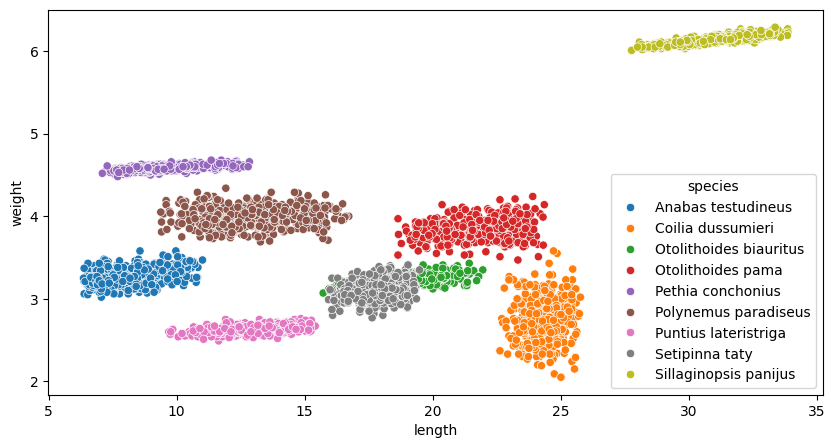

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

sns.scatterplot(data=df_data, x="length", y="weight", hue='species')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [29]:
print("Features: ", df_data.columns.drop("species").to_numpy())

print("Labels: ", df_data.columns[0])

Features:  ['length' 'weight' 'w_l_ratio']
Labels:  species


# Splitting data

In [30]:
X = df_data.drop("species", axis=1)
y = df_data["species"]

In [31]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=23) # 70% training and 30% test

# Train model

In [48]:
from sklearn.svm import SVC

non_linear_svm = SVC(kernel='rbf')
non_linear_svm.fit(X_train.iloc[:, :2], y_train)

SVC()

In [52]:
non_linear_predictions = non_linear_svm.predict(X_test.iloc[:,:2])
non_linear_predictions

array(['Setipinna taty', 'Setipinna taty', 'Polynemus paradiseus', ...,
       'Polynemus paradiseus', 'Coilia dussumieri',
       'Polynemus paradiseus'], dtype=object)

In [53]:
non_linear_accuracy = accuracy_score(y_test, non_linear_predictions)
non_linear_accuracy

0.8808724832214765

In [54]:
cm_non_linear = confusion_matrix(y_test, non_linear_predictions)
cm_non_linear

array([[137,   0,   0,   0,   0,   2,   2,   0,   0],
       [  0, 118,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  49,  11,   0,   0,   0,  74,   0],
       [  0,   1,   9, 120,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 116,   9,   0,   0,   0],
       [  2,   0,   0,   0,   4, 123,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0, 128,   0,   0],
       [  0,   0,  27,   0,   0,   0,   0, 123,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 136]])